이번 토픽을 통해 배운 PCA를 실제 분석에 활용해 보려고 하는데요.  
PCA를 통해 차원이 많은 데이터를 축소하고, 이어서 k-means 클러스터링까지 하여 데이터가 가진 특성을  
파악하는 분석을 진행해 보도록 할게요.

## 데이터 불러오기
먼저, 분석에 사용할 데이터를 불러와 보도록 하겠습니다.

In [1]:
import pandas as pd

credit_df1 = pd.read_csv('data/CC_GENERAL.csv')
credit_df1.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


`CC_GENERAL`는 신용 카드 사용자 정보와 해당 사용자가 발급한 신용 카드 정보를 나타내는 데이터 세트입니다.  
해당 데이터 세트는 은행에서 제공하는 고객 정보와 신용 카드 사용 내역을 바탕으로 구성되어 있는데요.  
각 열이 나타내는 정보는 아래와 같습니다.  
- 고객 정보
    - `CUST_ID`: 고객 아이디
- 잔액 관련 컬럼
    - `BALANCE`: 현재 잔액
    - `BALANCE_FREQUENCY`: 잔액 갱신 빈도
- 구매 관련 컬럼
    - `PURCHASES`: 총 구매 금액
    - `ONEOFF_PURCHASES`: 일시불 구매 금액
    - `INSTALLMENTS_PURCHASES`: 할부 구매 금액
    - `PURCHASES_FREQUENCY`: 구매 빈도
    - `ONEOFF_PURCHASES_FREQUENCY`: 일시불 구매 빈도
    - `PURCHASES_INSTALLMENT_FREQUENCY`: 할부 구매 빈도
    - `PURCHASES_TRX`: 총 구매 거래 횟수
- 현금 서비스 관련 컬럼
    - `CASH_ADVANCE`: 현금 서비스에 대한 금액
    - `CASH_ADVANCE_FREQUENCY`: 현금 서비스 빈도
    - `CASH_ADVANCE_TRX`: 현금 서비스 거래 횟수
- 신용 한도 관련 컬럼
    - `CREDIT_LIMIT`: 신용 한도
- 지불 관련 컬럼
    - `PAYMENTS`: 총 지불 금액
    - `MINIMUM_PAYMENTS`: 최소 지불 금액
    - `PRC_FULL_PAYMENT`: 전액 지불 비율

## 데이터 표준화
데이터 중 고객 아이디인 `CUST_ID`를 제외한 고객 정보 데이터를 분리하겠습니다.  
그리고 각 열의 기초 통계량도 확인해 볼게요.

In [2]:
credit_df2 = credit_df1.drop('CUST_ID', axis=1)

credit_df2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


각 열의 평균과 표준편차를 확인해 보면, 데이터가 분포한 범위와 데이터 간 단위가 서로 차이가 많이 난다는 것을 알 수 있는데요.  
주성분을 찾을 때 각 열의 분포 범위와 단위의 영향이 고려되지 않도록 PCA 전에 먼저 각 열의 단위를 조정해 주도록 하겠습니다.

In [3]:
# 스케일링
scaled_credit_df2 = (credit_df2 - credit_df2.mean()) / credit_df2.std()  # 컬럼별 표준화

## PCA
`CUST_ID`를 제외하면 데이터에 총 17개의 열이 있는데요. 차원이 너무 많아서 데이터의 분포나 특징을  
시각화로 파악하는 것이 어렵겠네요. 관련하여, PCA를 통해 모든 차원의 특징을 최대한 살리면서, 동시에 데이터의 특징을  
한 눈에 파악할 수 있도록 2차원으로 차원을 축소해 볼게요.

In [6]:
from sklearn.decomposition import PCA

X = scaled_credit_df2.copy()

# 객체
pca = PCA(n_components=2)

# 적용
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df.head()

,0,1
0,-1.682126,-1.076390
1,-1.138231,2.506337
2,0.969629,-0.383496
3,-0.873579,0.043164
4,-1.599344,-0.688543


## k-means 클러스터링
다음으로, PCA를 통해 차원을 2개로 줄인 데이터를 활용하여 클러스터링을 진행해 보겠습니다.  
클러스터링에는 k-means를 활용할 건데요. 먼저, 최적의 군집 개수를 확인하기 위하여 Elbow plot을 그려보도록 하겠습니다.

<Axes: >

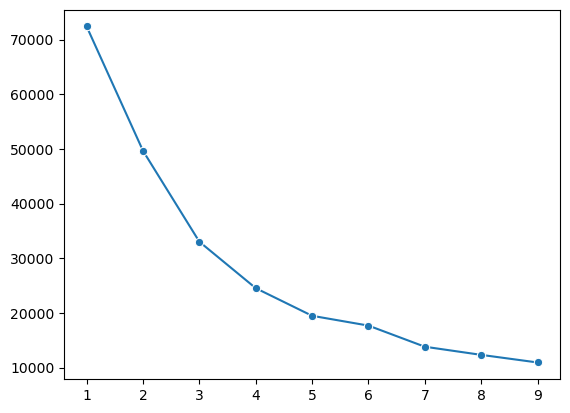

In [9]:
import seaborn as sns
from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)  # 모델 생성
    model.fit(pca_df)  # 모델 학습
    inertias.append(model.inertia_)  # inertias 변수(리스트형)에 각 k에 따른 inertia 값 추가

# 시각화
sns.lineplot(x=ks, y=inertias, marker='o')

그래프의 기울기를 확인해 보니, k의 값이 6일 때부터 inertia 값의 감소 폭이 작아지는 것 같네요.  
따라서, k를 6으로 지정한 후에 k-means를 해주겠습니다.  
클러스터링을 해 준 후에는 시각화까지 해서 데이터들의 특징을 살펴보도록 할게요.

<Axes: xlabel='PC1', ylabel='PC2'>

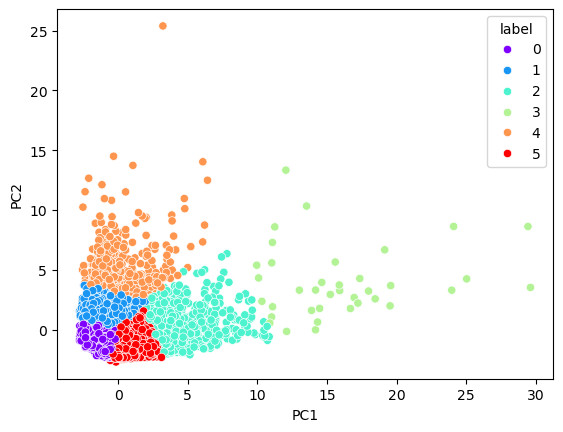

In [11]:
model = KMeans(n_clusters=6)
model.fit(pca_df)
labels = model.labels_  # 고객마다 부여할 클러스터 (labels_는 각 고객이 어느 클러스터로 묶였는지 그 클러스터의 번호를 반환하는 KMeans의 속성(메서드가 아님).)
x, y = pca_df[0], pca_df[1]  # x와 y는 각각 첫 번째, 두 번째 칼럼.

# PCA 진행한 데이터프레임에 클러스터 번호 부여
pca_km_df = pd.DataFrame({'PC1':x, 'PC2':y, 'label':labels})

# 시각화
sns.scatterplot(data=pca_km_df, x='PC1', y='PC2', hue='label', palette='rainbow')

클러스터 3과 4에 속한 고객들이 가장 많이 흩어져 있으며, 나머지 클러스터에 속한 고객들은 상대적으로 유사한 특징을  
가지고 있는 게 보이네요.

## 클러스터 결과 해석
이제 같은 클러스터로 묶인 데이터들 사이에 어떤 특징이 있는지 찾아보도록 할 건데요.  
먼저, 원본 데이터에 있는 각 행의 고객 정보마다 속한 클러스터 번호를 부여해 보겠습니다.

In [12]:
# k = 6인 k-means 클러스터링 진행
model = KMeans(n_clusters=6, random_state=111)
model.fit(pca_df)

lables = model.labels_  # 고객마다 부여할 클러스터

# 원본 데이터에 클러스터 부여
credit_df1['cluster'] = labels

부여한 클러스터 번호를 토대로, 각 클러스텨별 할당된 고객의 숫자를 확인해 보면 다음과 같습니다.

In [13]:
credit_df1['CUST_ID'].groupby(credit_df1['cluster']).count()

cluster
0    3062
1    1766
2     713
3      37
4     502
5    2870
Name: CUST_ID, dtype: int64

클러스터 1이 가장 많고 클러스터 5에 속한 고객이 제일 적네요.

그렇다면 클러스터데 따라 각 열의 값에는 어떠한 차이가 있을까요?  
열이 많기 때문에 편의를 위해 행과 열을 바꿔서 출력해 볼게요.  
참고로, `.T`를 사용하면 결과의 행과 열을 바꿔줄 수 있습니다.

```python
# pandas 버전 차이로 인해 실행 오류.(결과는 이미지로 대체!)
credit_df1.groupby(credit_df1['cluster']).mean().T
```

![image](image/08-이미지1.png)

이러한 클러스터별 특징을 활용해 대출 서비스를 제안할 고객들을 찾아볼 수 있습니다.  
여러 컬럼들 중 대출과 관련있어 보이는 잔액(`BALANCE`), 잔액 갱신 빈도(`BALANCE_FREQUENCY`),  
이렇게 두 개의 컬럼을 활용해 클러스터별로 어떤 특징이 있는지 살펴볼까요?

```python
credit_df1.groupby(credit_df1['cluster']).mean().T.iloc[[0,1], ]
```

![image](image/08-이미지2.png)

- 클러스터 0: 평균 잔액이 중간인 편이며 잔액 갱신 빈도가 가장 높은 고객군
- 클러스터 1: 평균 잔액이 낮은 편이며 잔액 갱신 빈도가 가장 낮은 고객군
- 클러스터 2: 평균 잔액이 가장 높은 편이며 잔액 갱신 빈도가 높은 편인 고객군
- 클러스터 3: 평균 잔액이 중간 정도이며 잔액 갱신 빈도가 중간 정도인 고객군
- 클러스터 4: 평균 잔액이 가장 낮으며 잔액 갱신 빈도가 낮은 편인 고객군
- 클러스터 5: 평균 잔액이 높은 편이며 잔액 갱신 빈도가 높은 편인 고객군

위 분석을 토대로 대출 서비스를 제안한다고 가정했을 때  
평균 잔액이 적고 잔액 갱신 빈도가 낮아 대출에 대한 수요가 있을 것으로 추정되는 클러스터1과 클러스터4의 고객들에게  
제안하는 것이 합리적인 제안이라고 판단할 수 있겠네요.